In [166]:
library(foreach)
library(reshape2)
library(factoextra)
library(FactoMineR)
library(dplyr)

In [8]:
ELC=readRDS("ELC.rds")
elc=as.data.frame(readRDS("ELC_per_sample.rds"))

In [9]:
head(ELC)

,ERR1248084,ERR1248085,ERR1248086,ERR1248087,ERR1248088,ERR1248089,ERR1248116,ERR1248117,ERR1248118,ERR1248119,⋯,ERR781076,ERR781077,ERR781078,ERR781079,ERR781080,ERR781081,ERR781082,ERR781083,ERR781084,ERR781085
Horvu_MOREX_1H01G000100,E4,E4,E4,E4,E4,E4,E4,E4,E4,E4,⋯,E3,E4,E4,E4,E3,E3,E3,E4,E4,E3
Horvu_MOREX_1H01G000200,E1,E1,E2,E2,E1,E2,E3,E4,E4,E4,⋯,E3,E2,E2,E2,E3,E3,E3,E2,E2,E2
Horvu_MOREX_1H01G000300,E3,E3,E3,E4,E3,E3,E4,E4,E4,E4,⋯,E3,E3,E3,E3,E3,E3,E3,E3,E3,E3
Horvu_MOREX_1H01G000400,E4,E4,E3,E4,E4,E4,E3,E3,E3,E3,⋯,E3,E4,E4,E4,E3,E3,E3,E3,E3,E3
Horvu_MOREX_1H01G000500,E4,E4,E4,E4,E4,E4,E4,E4,E4,E4,⋯,E4,E4,E4,E4,E3,E3,E4,E4,E4,E4
Horvu_MOREX_1H01G000600,E4,E4,E4,E4,E4,E4,E4,E4,E4,E4,⋯,E4,E4,E4,E4,E3,E3,E4,E4,E4,E4


In [10]:
rownames(elc)=elc[,1]
elc=elc[,-c(1:2)]
head(elc)

,E0,E1,E2,E3,E4
,<int>,<int>,<int>,<int>,<int>
ERR1248084,22318,5606,6246,8262,6849
ERR1248085,19781,6678,6782,8587,7453
ERR1248086,21225,6329,6569,8556,6602
ERR1248087,20287,6725,6676,8582,7011
ERR1248088,23226,6091,5546,7435,6983
ERR1248089,21089,6544,6343,8206,7099


In [11]:
m=round(apply(elc,2,mean))

In [12]:
test_category=function(e,i){
    x=unlist(elc[i,])
    ma=matrix(c(x[e],
                sum(x[-e]),
                m[e],
                sum(m[-e])
               ),ncol=2)
    return(chisq.test(ma)$p.value)
}

In [13]:
d=foreach(e=seq_len(ncol(elc)),.combine="cbind") %:% foreach (i=seq_len(nrow(elc)),.combine="c") %do% {
    test_category(e,i)
}
rownames(d)=rownames(elc)
colnames(d)=colnames(elc)

In [14]:
head(d)

,E0,E1,E2,E3,E4
ERR1248084,7.015608e-49,3.011180e-02,6.549370e-05,8.247927e-07,2.540185e-50
ERR1248085,6.941818e-211,3.510772e-16,1.735308e-19,1.622290e-14,5.479374e-92
ERR1248086,2.369516e-104,1.099803e-06,1.800064e-12,1.195849e-13,1.337586e-36
ERR1248087,3.441113e-169,8.667195e-18,8.475053e-16,2.248667e-14,2.137609e-60
ERR1248088,5.737124e-19,9.620666e-03,4.228844e-03,2.422810e-02,1.351061e-58
ERR1248089,9.285588e-113,5.069932e-12,8.773365e-07,8.530074e-06,3.246491e-66


In [15]:
dd=matrix(p.adjust(d,method="fdr"),ncol=ncol(d),nrow=nrow(d))
rownames(dd)=rownames(d)
colnames(dd)=colnames(d)

In [16]:
head(dd)

,E0,E1,E2,E3,E4
ERR1248084,7.516723e-48,4.032830e-02,1.180067e-04,1.783335e-06,2.796534e-49
ERR1248085,1.190026e-208,1.328999e-15,7.384288e-19,5.578074e-14,1.603719e-90
ERR1248086,8.616422e-103,2.348335e-06,5.684411e-12,3.942358e-13,1.028912e-35
ERR1248087,3.441113e-167,3.432553e-17,3.158405e-15,7.665910e-14,3.053727e-59
ERR1248088,2.407185e-18,1.372747e-02,6.335346e-03,3.300082e-02,1.801414e-57
ERR1248089,4.126928e-111,1.555989e-11,1.890133e-06,1.697527e-05,5.336697e-65


In [17]:
table(dd[,"E4"]<0.01)


FALSE  TRUE 
   33   207 

In [18]:
head(elc)

,E0,E1,E2,E3,E4
,<int>,<int>,<int>,<int>,<int>
ERR1248084,22318,5606,6246,8262,6849
ERR1248085,19781,6678,6782,8587,7453
ERR1248086,21225,6329,6569,8556,6602
ERR1248087,20287,6725,6676,8582,7011
ERR1248088,23226,6091,5546,7435,6983
ERR1248089,21089,6544,6343,8206,7099


In [19]:
M=apply(elc/rowSums(elc),2,mean)

In [20]:
chisq.test(elc[1,],p=M)


	Chi-squared test for given probabilities

data:  elc[1, ]
X-squared = 742.8, df = 4, p-value < 2.2e-16


In [21]:
elc[1,]
elc[1,]/rowSums(elc[1,])

,E0,E1,E2,E3,E4
,<int>,<int>,<int>,<int>,<int>
ERR1248084,22318,5606,6246,8262,6849


,E0,E1,E2,E3,E4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERR1248084,0.4528723,0.1137558,0.1267426,0.1676508,0.1389785


In [22]:
test_category=function(e,i){
    x=unlist(elc[i,])
    return(chisq.test(x,p=M)$p.value)
}

In [23]:
d=foreach(e=seq_len(ncol(elc)),.combine="cbind") %:% foreach (i=seq_len(nrow(elc)),.combine="c") %do% {
    test_category(e,i)
}
d=matrix(p.adjust(d,method="fdr"),ncol=ncol(d),nrow=nrow(d))
rownames(d)=rownames(elc)
colnames(d)=colnames(elc)

In [24]:
table(d[,"E4"]<0.01)


FALSE  TRUE 
    3   237 

In [55]:
md=read.csv("barley_final.csv",stringsAsFactors=TRUE)
head(md)

,Dataset,PMID,Run.ID,NCBI.BioProject,SRA.Sample.ID,BioSample.ID,Sample.Name.Alias,Batch,Organism,Cultivar,⋯,Temperature_day_night_c,Growth_location,Seq_location,Instrument,Library.layout,PO.dev.general,PO.dev.narrow,PO.tissue,Metadata,Read.length..bp.
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,inflorescence_development,26307377,ERR781039,PRJEB8748,ERS680781,SAMEA3304876,A_Apex_SD_S42-IL017_W0.5_0DAS_rep1,1,Hordeum vulgare,S42-IL107,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007057,PO:0007045,PO:0000037,biological replication 1.1 harvest time 0 photoperiod Short Day,100
2,inflorescence_development,26307377,ERR781040,PRJEB8748,ERS680782,SAMEA3304854,B_Apex_SD_S42-IL017_W0.5_0DAS_rep2,1,Hordeum vulgare,S42-IL107,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007057,PO:0007045,PO:0000037,biological replication 1.2 harvest time 0 photoperiod Short Day,100
3,inflorescence_development,26307377,ERR781041,PRJEB8748,ERS680783,SAMEA3304885,C_Apex_SD_S42-IL017_W0.5_0DAS_rep3,1,Hordeum vulgare,S42-IL107,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007057,PO:0007045,PO:0000037,biological replication 1.3 harvest time 0 photoperiod Short Day,100
4,inflorescence_development,26307377,ERR781042,PRJEB8748,ERS680784,SAMEA3304846,D_Apex_LD_Scarlett_W1_3DAS_rep1,2,Hordeum vulgare,Scarlett,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007112,PO:0007094,PO:0000037,biological replication 2.1 harvest time 3 photoperiod Long Day,100
5,inflorescence_development,26307377,ERR781043,PRJEB8748,ERS680785,SAMEA3304859,E_Apex_LD_Scarlett_W1_3DAS_rep2,2,Hordeum vulgare,Scarlett,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007112,PO:0007094,PO:0000037,biological replication 2.2 harvest time 3 photoperiod Long Day,100
6,inflorescence_development,26307377,ERR781044,PRJEB8748,ERS680786,SAMEA3304878,F_Apex_LD_Scarlett_W1_3DAS_rep3,2,Hordeum vulgare,Scarlett,⋯,22_18,Germany,Germany,Illumina HiSeq 2000,single,PO:0007112,PO:0007094,PO:0000037,biological replication 2.3 harvest time 3 photoperiod Long Day,100


In [31]:
data.frame(seq_len(ncol(md)),names(md))

seq_len.ncol.md..,names.md.
<int>,<fct>
1,Dataset
2,PMID
3,Run.ID
4,NCBI.BioProject
5,SRA.Sample.ID
6,BioSample.ID
7,Sample.Name.Alias
8,Batch
9,Organism


In [198]:
e=merge(elc/rowSums(elc),md[,c(1,3,17,18,20:23,28:30)],by.x=0,by.y="Run.ID")
row.names(e)=e[,1]
e=e[,-1]
dim(e)
head(e)

[1] 240  15

,E0,E1,E2,E3,E4,Dataset,Intermediate_tissue,High_level_tissue,RNA_extraction,RNA_enrichment,RNA_input..microg.,PCR_purification,Seq_location,Instrument,Library.layout
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ERR1248084,0.4528723,0.1137558,0.1267426,0.1676508,0.1389785,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired
ERR1248085,0.4013920,0.1355086,0.1376190,0.1742457,0.1512348,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired
ERR1248086,0.4306934,0.1284268,0.1332968,0.1736166,0.1339664,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired
ERR1248087,0.4116597,0.1364623,0.1354680,0.1741442,0.1422658,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired
ERR1248088,0.4712973,0.1235973,0.1125383,0.1508695,0.1416976,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired
ERR1248089,0.4279337,0.1327895,0.1287109,0.1665145,0.1440515,ref_dataset_drought,spike,inflorescence,unknown,unknown,unknown,unknown,Spain,Illumina HiSeq 2000,paired


In [199]:
res.pca = PCA(e,quali.sup=6:15,graph=F)


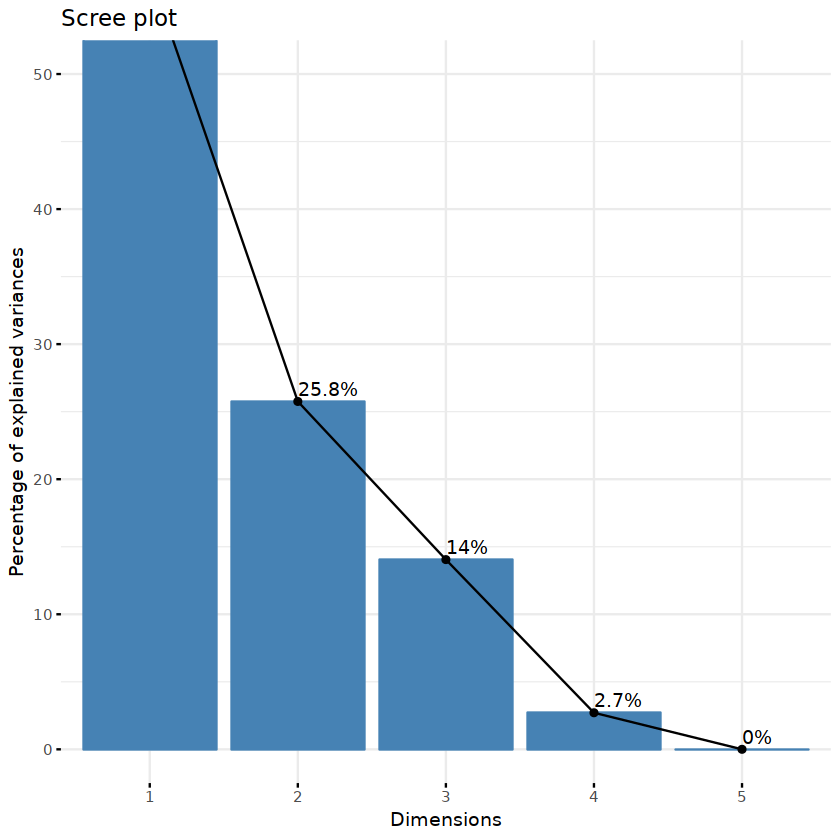

In [200]:
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

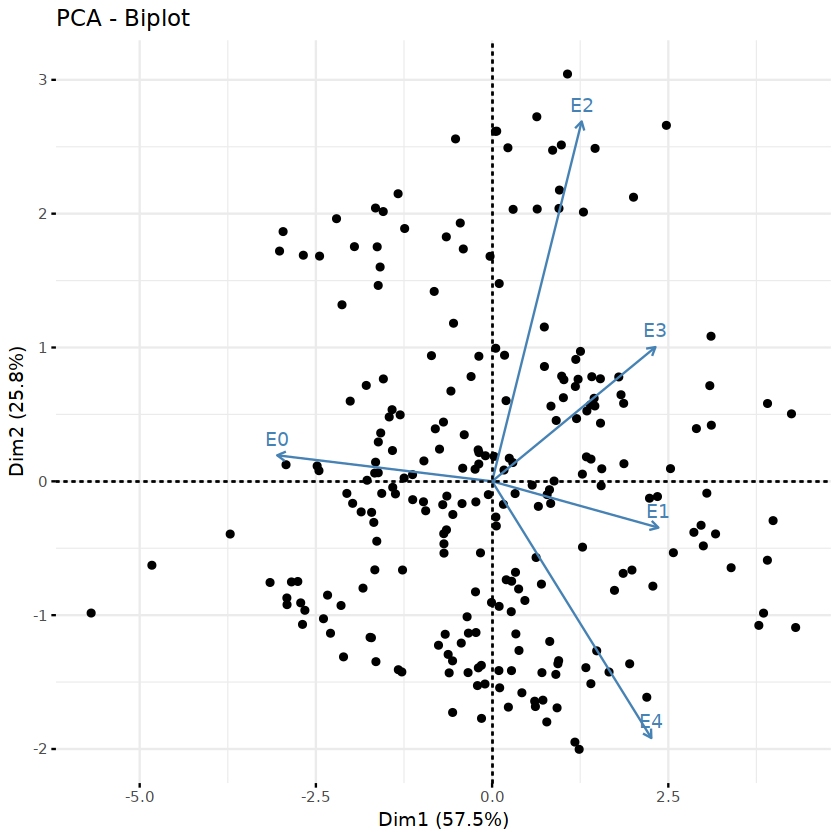

In [201]:
fviz_pca_biplot(res.pca, repel = FALSE,geom="point")

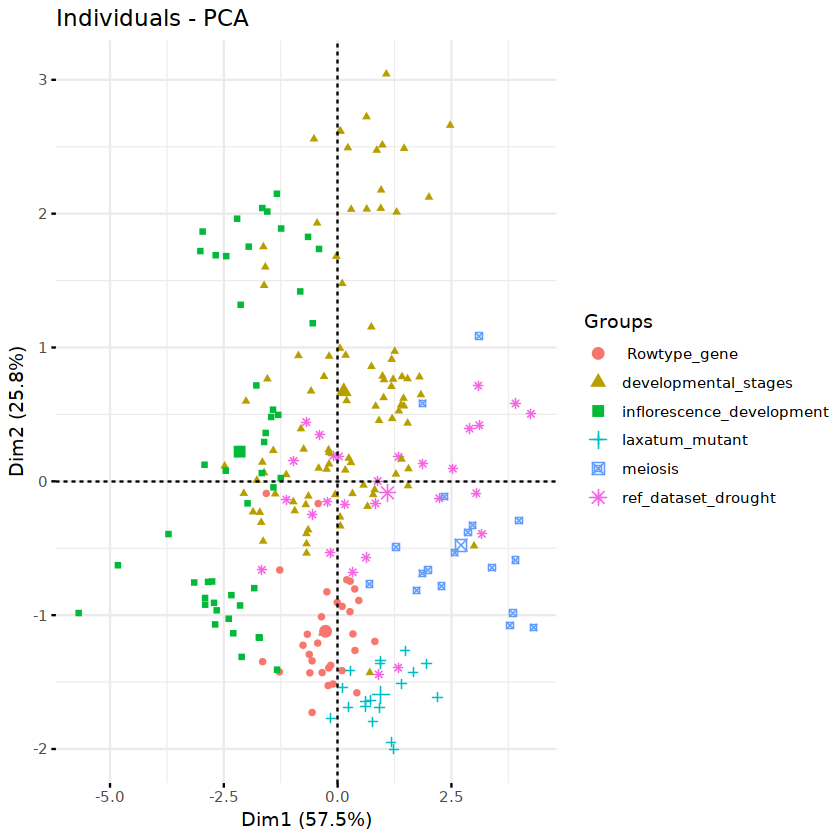

In [203]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$Dataset, # color by groups
             )

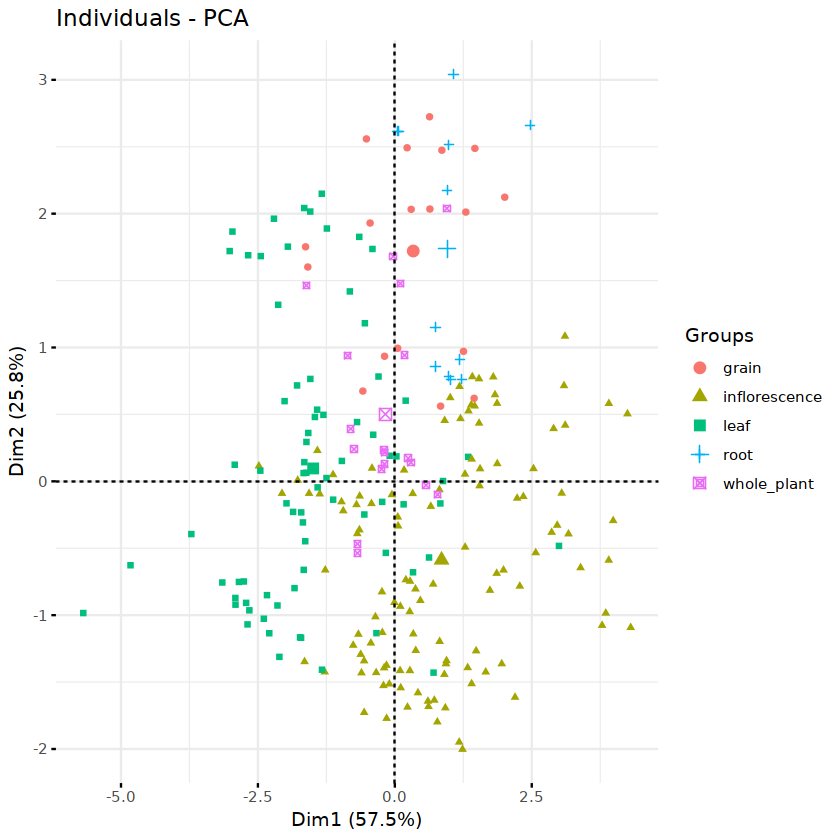

In [204]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$High_level_tissue, # color by groups
             )

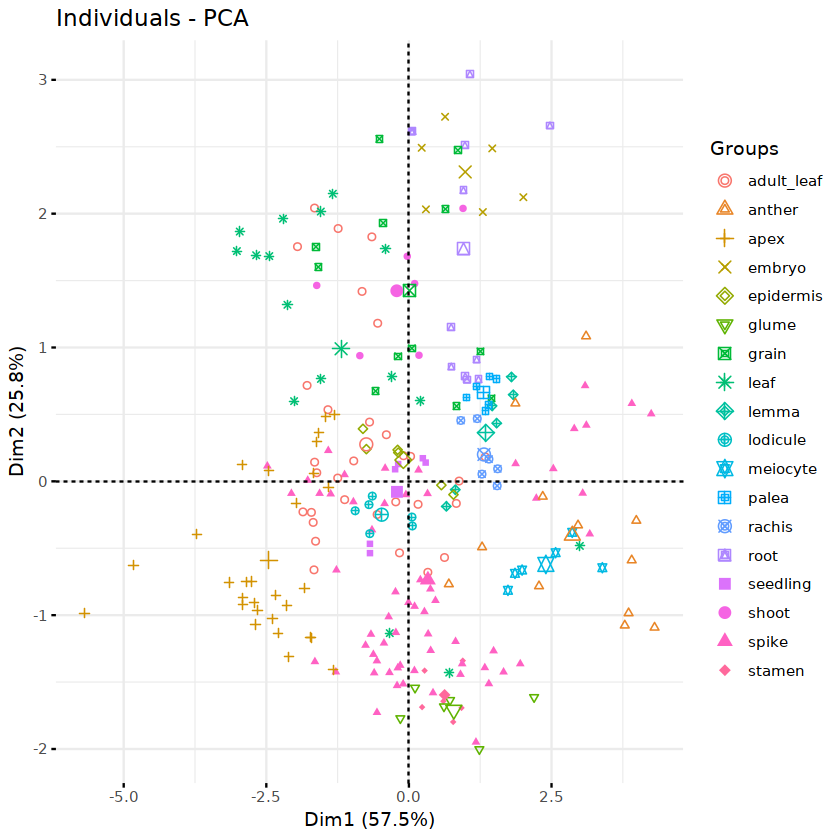

In [205]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$Intermediate_tissue, # color by groups
             )

In [224]:
e %>% 
    group_by(Library.layout,Intermediate_tissue) %>%
    summarize_at(c("E0","E1","E2","E3","E4"),list(median=median)) 

Library.layout,Intermediate_tissue,E0_median,E1_median,E2_median,E3_median,E4_median
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
paired,adult_leaf,0.5115257,0.1137457,0.1170025,0.1527769,0.10349831
paired,anther,0.4378970,0.1420020,0.1209087,0.1655202,0.13170390
paired,embryo,0.4846594,0.1160082,0.1413222,0.1671232,0.09104929
paired,epidermis,0.5053976,0.1092815,0.1169416,0.1619082,0.10616668
paired,glume,0.4818591,0.1233234,0.1034171,0.1557801,0.13478826
paired,grain,0.5031960,0.1267426,0.1343215,0.1577383,0.08764027
paired,leaf,0.5053469,0.1160691,0.1214261,0.1569773,0.09691362
paired,lemma,0.4663968,0.1261744,0.1287007,0.1603052,0.11635316
paired,lodicule,0.5090603,0.1130557,0.1194578,0.1491244,0.11276151


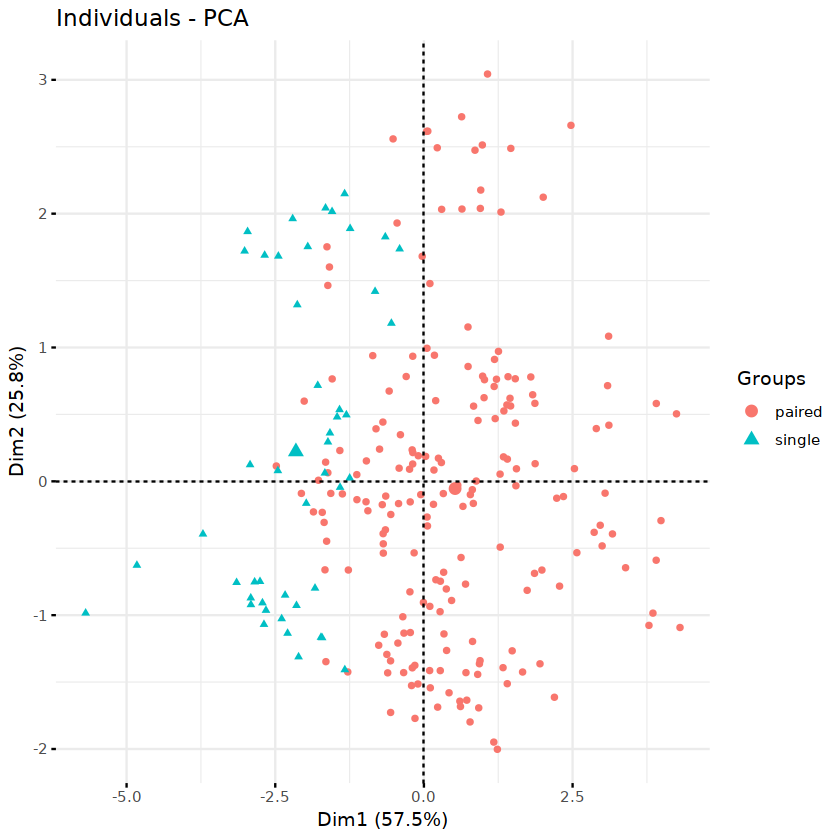

In [206]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$Library.layout, # color by groups
             )

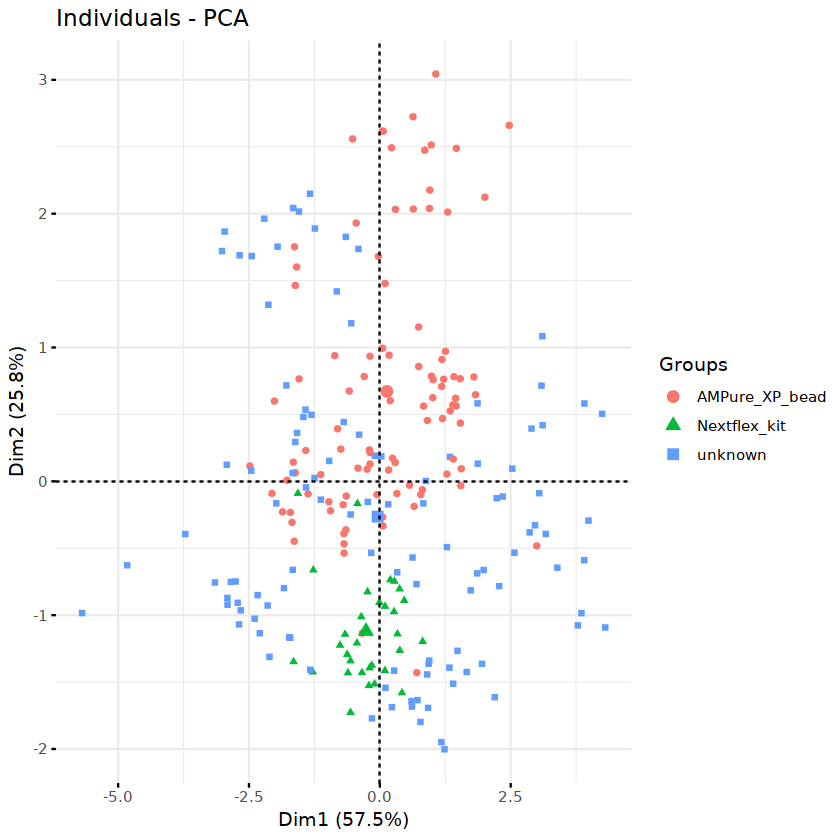

In [207]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$PCR_purification, # color by groups
             )

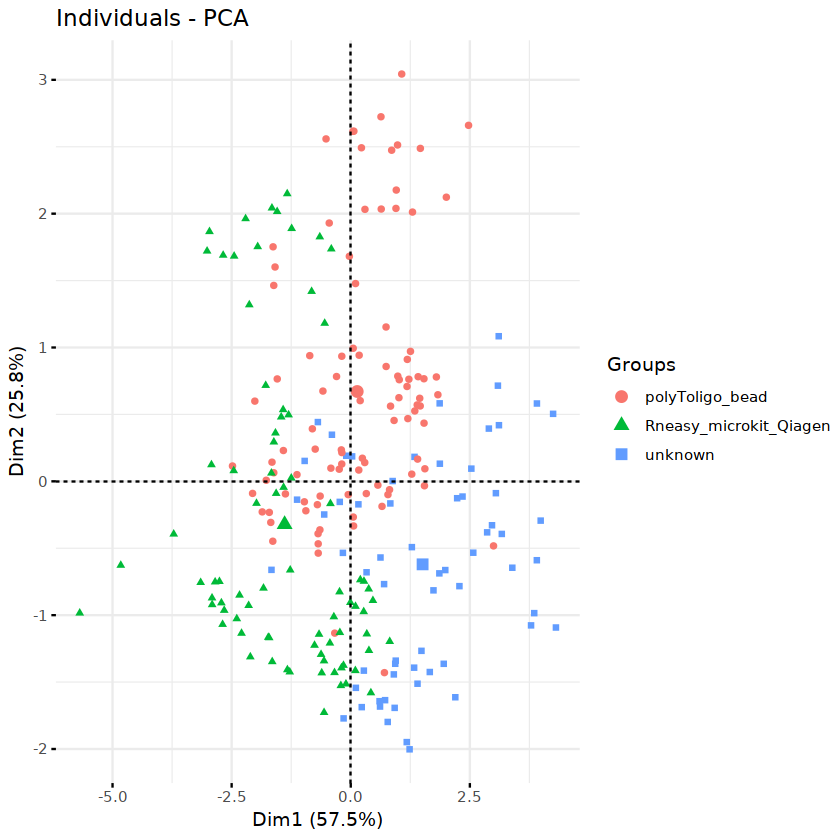

In [208]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$RNA_enrichment, # color by groups
             )

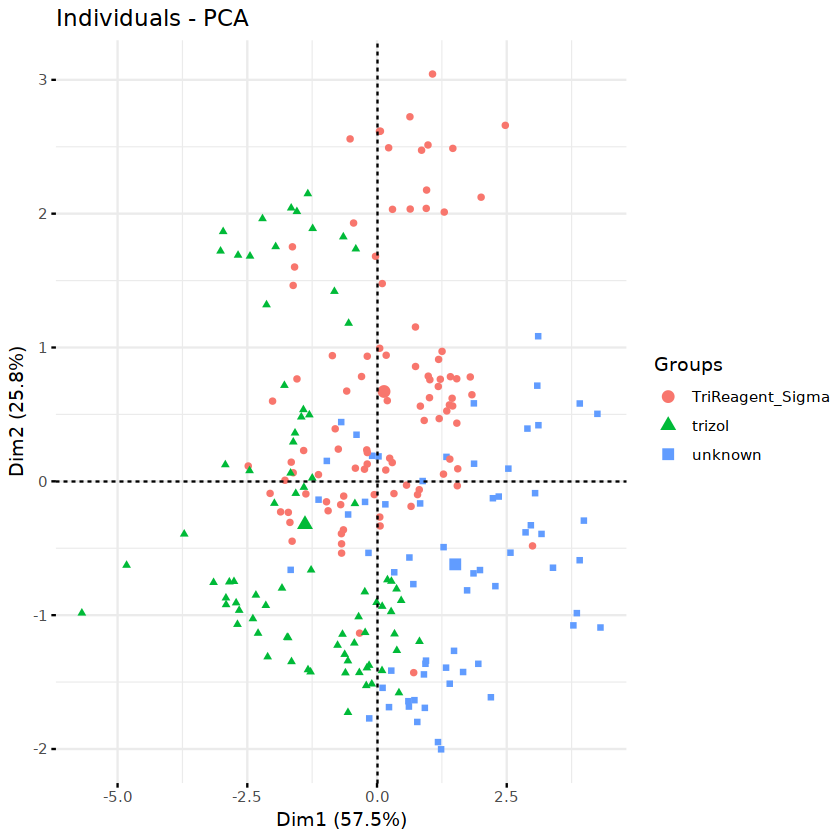

In [209]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$RNA_extraction, # color by groups
             )

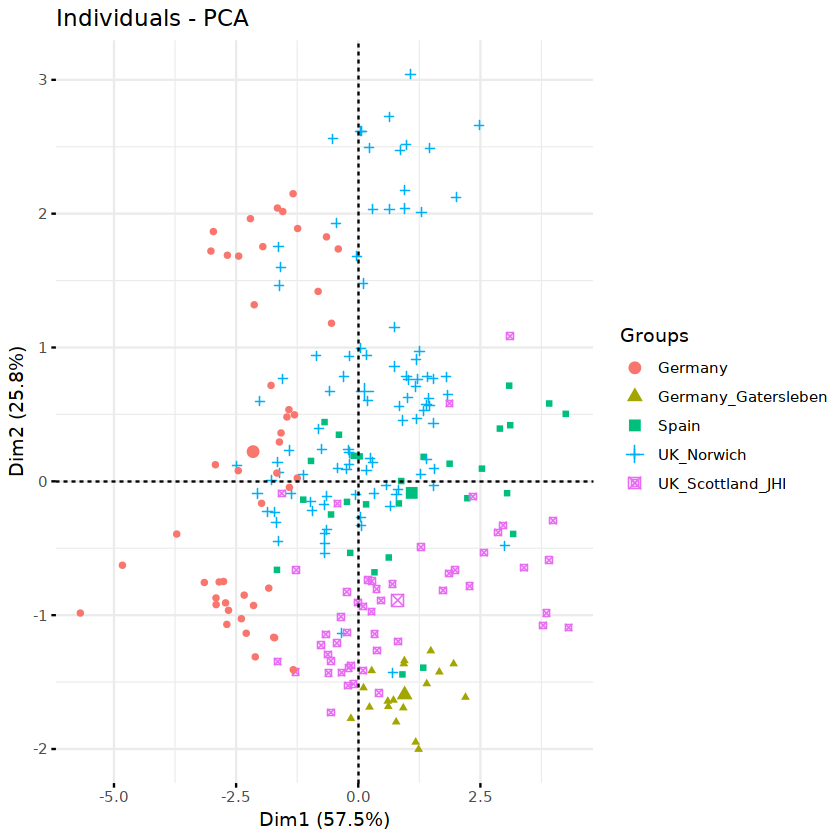

In [210]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$Seq_location, # color by groups
             )

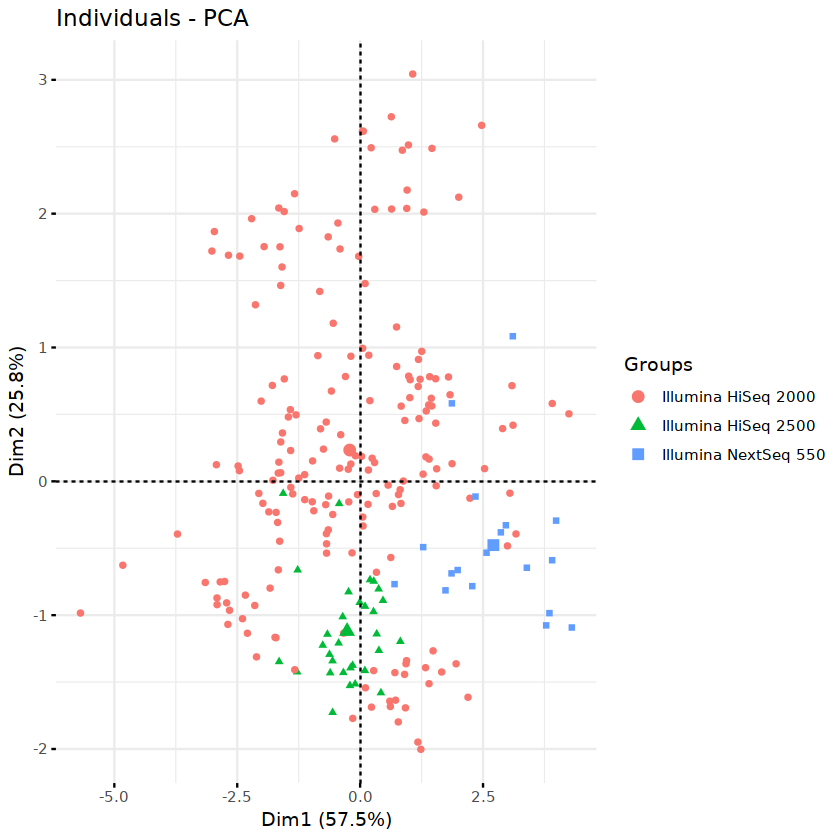

In [211]:
fviz_pca_ind(res.pca,
             label = "none", # hide individual labels
             habillage = e$Instrument, # color by groups
             )

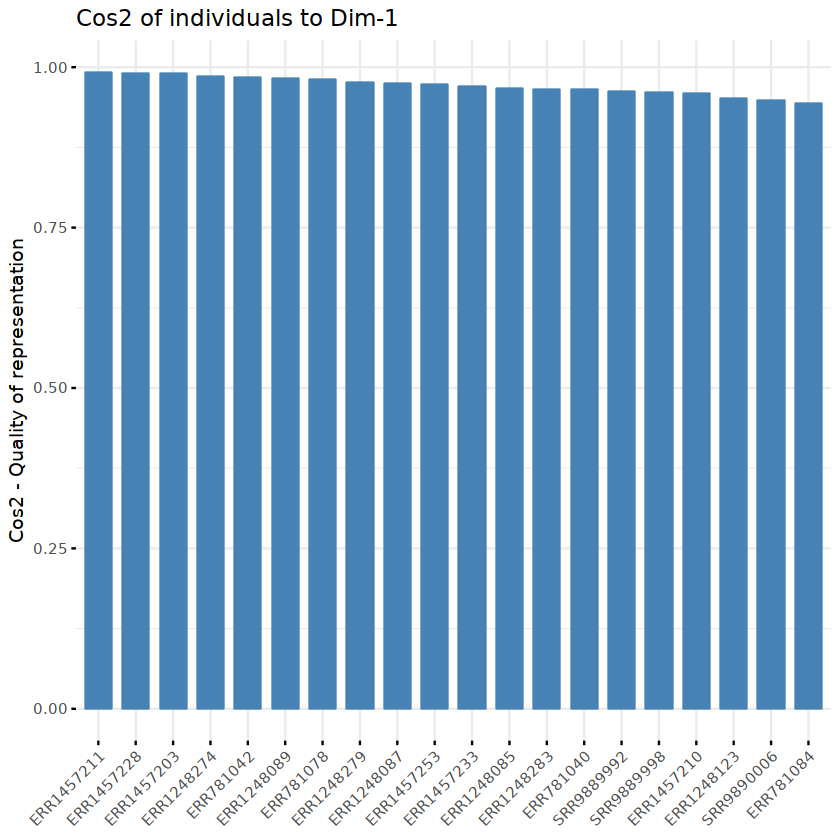

In [212]:
fviz_cos2(res.pca,"ind",top=20)

In [213]:
e["ERR1457228",]

,E0,E1,E2,E3,E4,Dataset,Intermediate_tissue,High_level_tissue,RNA_extraction,RNA_enrichment,RNA_input..microg.,PCR_purification,Seq_location,Instrument,Library.layout
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ERR1457228,0.465088,0.1259106,0.1218928,0.1634504,0.1236582,developmental_stages,rachis,inflorescence,TriReagent_Sigma,polyToligo_bead,1,AMPure_XP_bead,UK_Norwich,Illumina HiSeq 2000,paired


In [214]:
get_pca_var(res.pca)$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
E0,0.9916534,0.004033734,0.0000107233,0.004302181,3.246740e-30
E1,0.5935660,0.012767168,0.3666112741,0.027055600,3.229562e-31
E2,0.1722144,0.771286582,0.0225954494,0.033903588,3.060947e-31
E3,0.5728053,0.107347832,0.2819519995,0.037894885,1.879711e-31
E4,0.5443151,0.392346734,0.0311679754,0.032170209,1.172198e-30


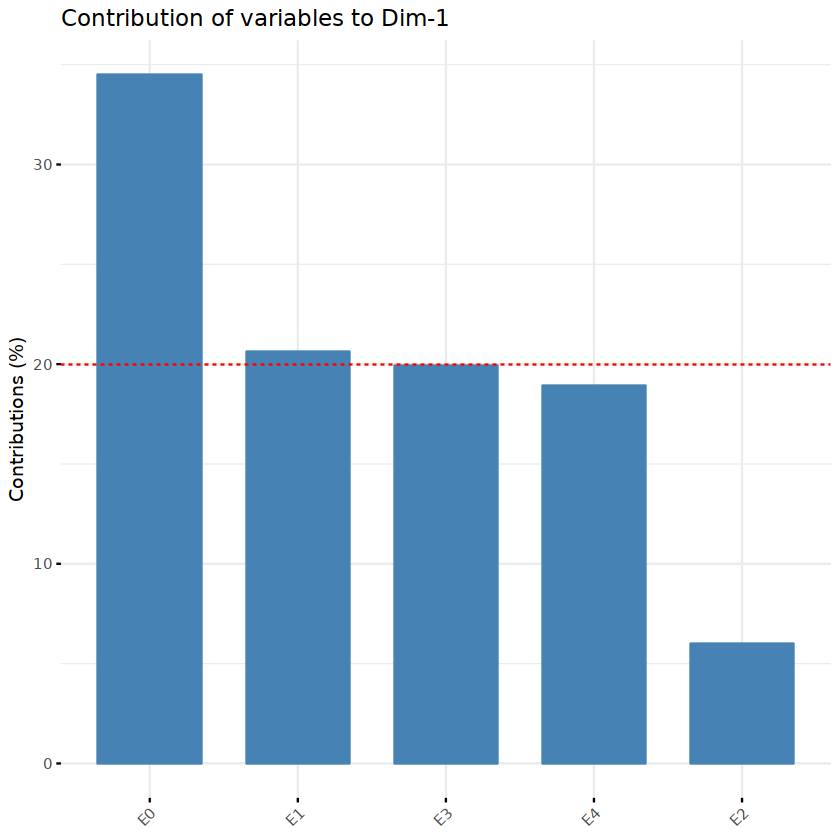

In [215]:
fviz_contrib(res.pca,"var",top=20,axis=1)

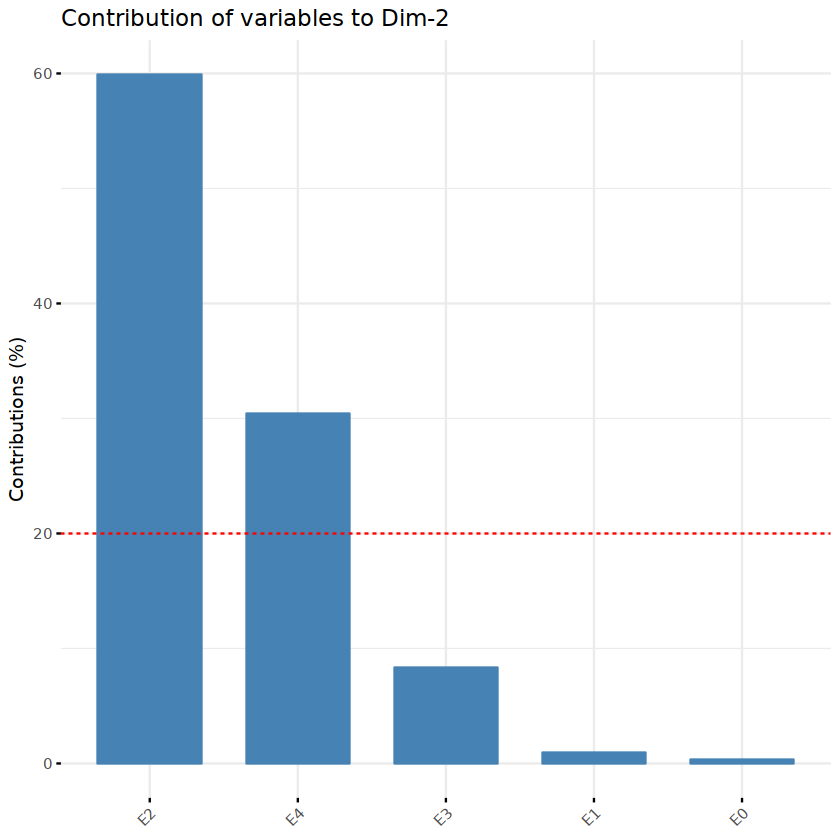

In [216]:
fviz_contrib(res.pca,"var",top=20,axes=2)

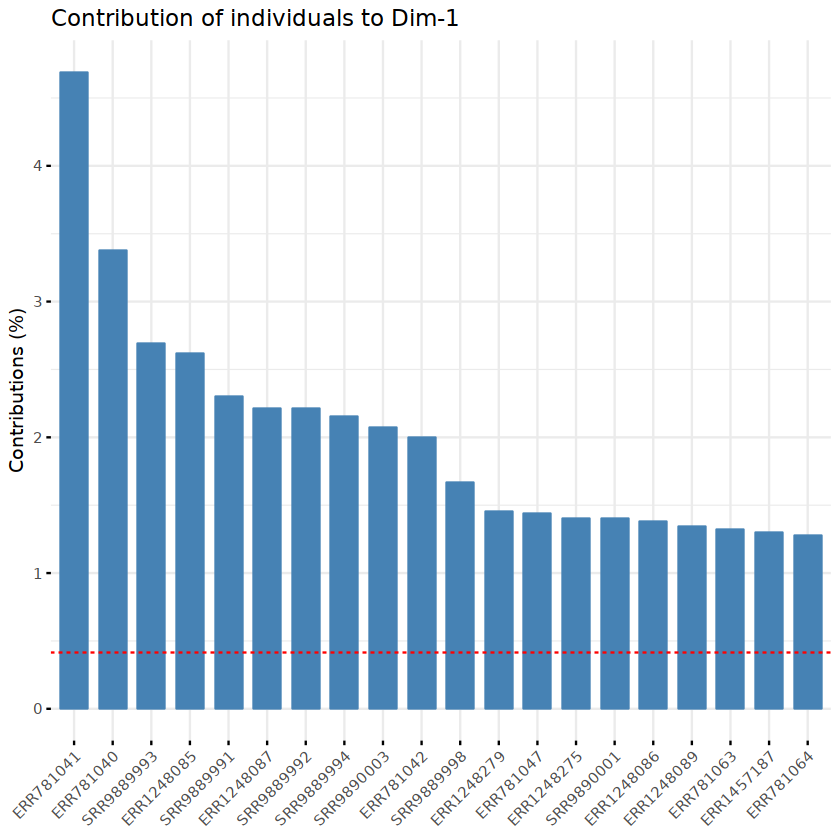

In [217]:
fviz_contrib(res.pca,"ind",top=20)

In [127]:
con=get_pca_ind(res.pca)$contrib
coords=get_pca_ind(res.pca)$coord

In [131]:
library(mclust)

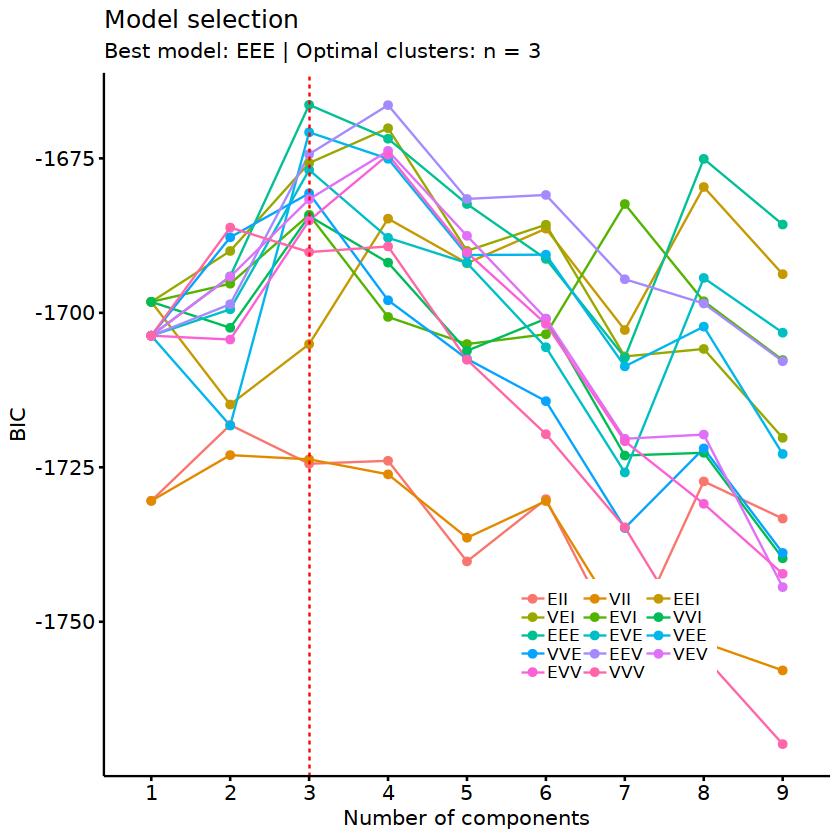

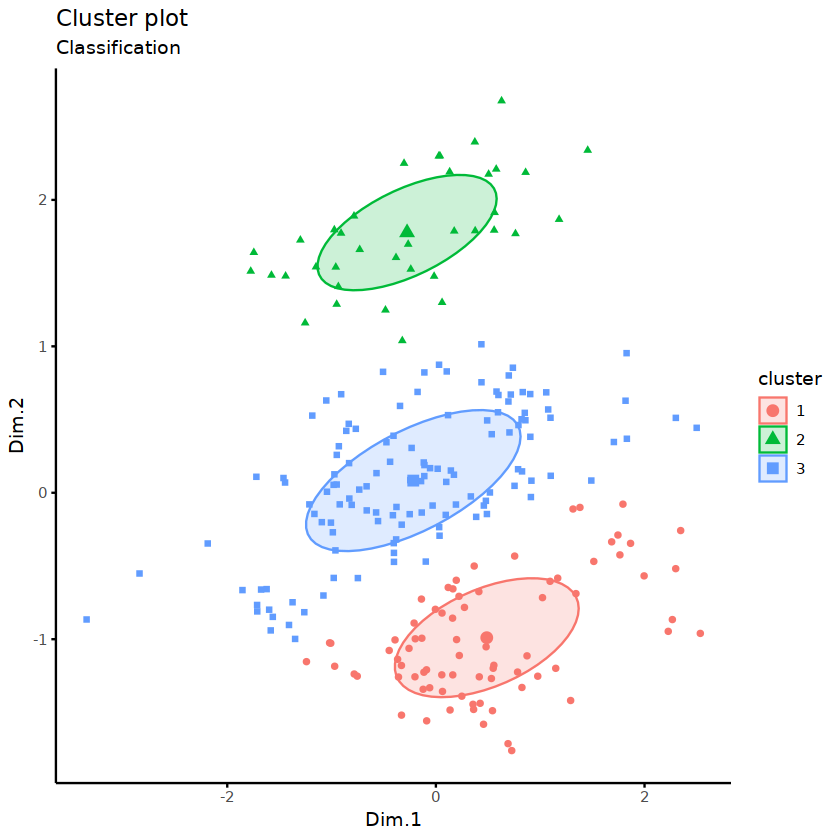

In [135]:
mc=Mclust(coords[,1:2])
fviz_mclust_bic(mc)
fviz_mclust(mc, "classification", geom = "point")

In [149]:
X=merge(elc/rowSums(elc),data.frame(mc$classification,mc$z,mc$uncertainty),by=0)
names(X)[7:11]=c("cluster","p1","p2","p3","uncertainty")
row.names(X)=X[,1]
X=X[,-1]
head(X)

,E0,E1,E2,E3,E4,cluster,p1,p2,p3,uncertainty
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERR1248084,0.4528723,0.1137558,0.1267426,0.1676508,0.1389785,3,0.078473608,3.807952e-07,0.9215260110,0.0784739890
ERR1248085,0.4013920,0.1355086,0.1376190,0.1742457,0.1512348,3,0.238549719,1.921307e-07,0.7614500889,0.2385499111
ERR1248086,0.4306934,0.1284268,0.1332968,0.1736166,0.1339664,3,0.009403915,1.775984e-05,0.9905783247,0.0094216753
ERR1248087,0.4116597,0.1364623,0.1354680,0.1741442,0.1422658,3,0.091188471,9.387629e-07,0.9088105905,0.0911894095
ERR1248088,0.4712973,0.1235973,0.1125383,0.1508695,0.1416976,1,0.999384569,1.417668e-16,0.0006154308,0.0006154308
ERR1248089,0.4279337,0.1327895,0.1287109,0.1665145,0.1440515,1,0.756680010,1.239353e-09,0.2433199892,0.2433199904


In [170]:
q90=function(x) {quantile(x,0.9)}

In [172]:
X %>%
    group_by(cluster) %>%
    summarize_at(c("p1","p2","p3","uncertainty"), list(max=max,q90=q90))
  

cluster,p1_max,p2_max,p3_max,uncertainty_max,p1_q90,p2_q90,p3_q90,uncertainty_q90
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.999941e-01,7.443579e-09,0.4915171,0.4915171,9.998566e-01,2.344842e-10,0.254881731,0.254881732
2,2.606434e-07,9.999999e-01,0.3875677,0.3875679,2.894198e-10,9.999992e-01,0.008963292,0.008963292
3,4.352942e-01,1.889470e-01,0.9997076,0.4352942,1.063974e-01,5.883082e-03,0.999162224,0.116214559


In [175]:
subset(X, uncertainty >0.3)

,E0,E1,E2,E3,E4,cluster,p1,p2,p3,uncertainty
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERR1248274,0.4483269,0.1282847,0.12380025,0.1657028,0.13388527,1,5.084829e-01,7.443579e-09,0.4915171,0.4915171
ERR1248286,0.4824780,0.1277369,0.11811854,0.1513362,0.12033035,1,6.327116e-01,1.097782e-09,0.3672884,0.3672884
ERR781049,0.5510440,0.1069783,0.09922688,0.1461009,0.09664982,3,4.352942e-01,1.012206e-09,0.5647058,0.4352942
ERR781070,0.5197135,0.1059232,0.12045210,0.1683813,0.08552992,2,2.606434e-07,6.124321e-01,0.3875677,0.3875679
SRR9889995,0.4516954,0.1297863,0.11832146,0.1728455,0.12735131,1,5.334585e-01,6.540368e-09,0.4665415,0.4665415


In [177]:
X %>% 
    group_by(cluster) %>%
    summarize_at(c("E0","E1","E2","E3","E4"),list(min=min,median=median,max=max)) 

cluster,E0_min,E1_min,E2_min,E3_min,E4_min,E0_median,E1_median,E2_median,E3_median,E4_median,E0_max,E1_max,E2_max,E3_max,E4_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3995860,0.10712039,0.09723829,0.1436050,0.09786733,0.4824780,0.1247540,0.1089467,0.1549482,0.12956312,0.5461740,0.1658854,0.1287109,0.1728455,0.1564497
2,0.4474544,0.09098841,0.12045210,0.1275542,0.04332298,0.5119214,0.1151154,0.1365638,0.1603052,0.07710882,0.5701183,0.1506666,0.1497332,0.1783243,0.1099004
3,0.4013920,0.09048112,0.09798908,0.1215276,0.06347274,0.5089588,0.1139993,0.1183215,0.1549887,0.10401575,0.6224914,0.1375784,0.1376190,0.1777764,0.1512348


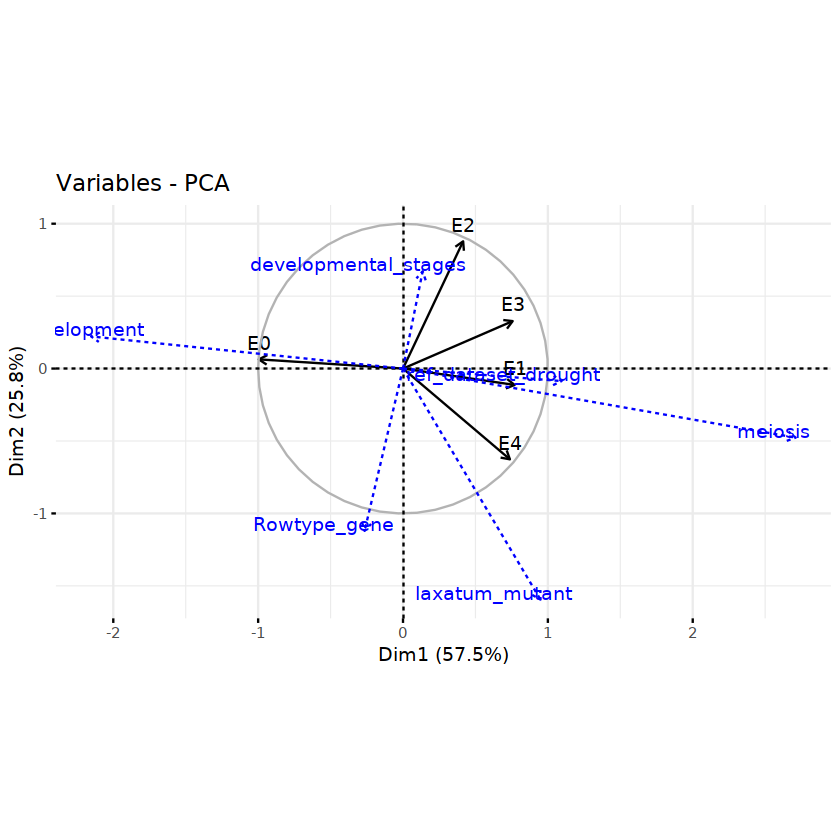

In [189]:
p =fviz_pca_var(res.pca)
coord=res.pca$quali.sup$coord
fviz_add(p, coord[c(1:6),], color ="blue", geom="arrow") 

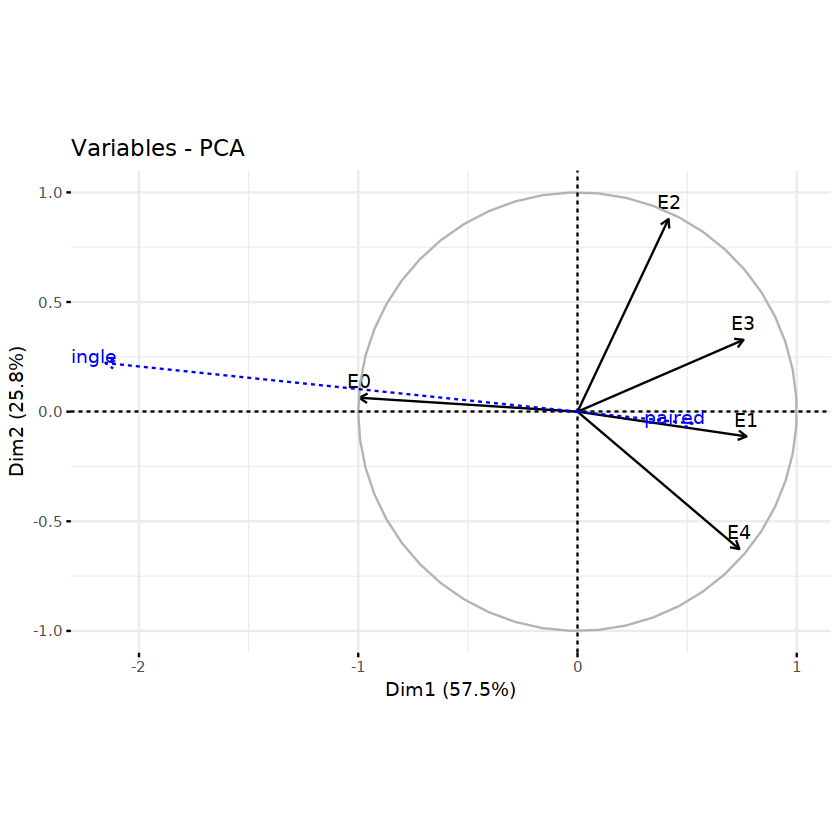

In [190]:
p =fviz_pca_var(res.pca)
coord=res.pca$quali.sup$coord
fviz_add(p, coord[c(64:65),], color ="blue", geom="arrow") 